In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import math


In [2]:
dataM = pd.read_parquet("Data/agg_table_new_zones8Bot.parquet")
pivot_df = dataM.pivot(index='time_bin', columns='h3_index', values='order_count')
pivot_df = pivot_df.fillna(0)


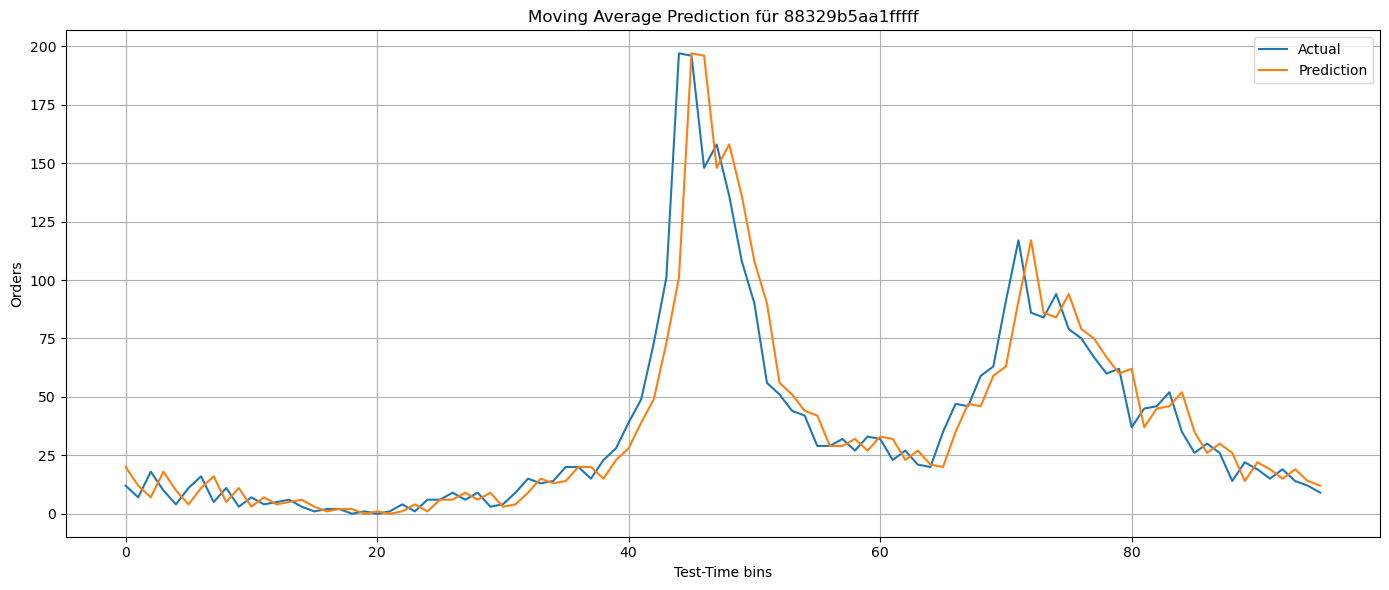

In [6]:
window_size = 1 # Only one time bin back
total_length = len(pivot_df)
split_index = int(total_length * 0.875)
test_df = pivot_df.iloc[split_index - window_size:]
area_rmses = {}
for area in test_df.columns:
    series = test_df[area].values
    predictions = []
    actuals = []

    for i in range(window_size, len(series)):
        avg = np.mean(series[i - window_size:i])
        predictions.append(avg)
        actuals.append(series[i])

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    rmse_i = math.sqrt(mean_squared_error(actuals, predictions))
    area_rmses[area] = rmse_i

    # Optional: Nur ein Plot für eine Beispiel-Area
    if area == "88329b5aa1fffff":  # genau den gewünschten H3-Index
        plt.figure(figsize=(14, 6))
        plt.plot(actuals, label='Actual')
        plt.plot(predictions, label='Prediction')
        plt.title(f'Moving Average Prediction für {area}')
        plt.xlabel('Test-Time bins')
        plt.ylabel('Orders')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import math

area_metrics = {}
all_actuals = []
all_predictions = []

for area in test_df.columns:
    series = test_df[area].values
    preds = []
    acts = []

    for i in range(window_size, len(series)):
        avg = np.mean(series[i - window_size:i])
        preds.append(avg)
        acts.append(series[i])

    preds = np.array(preds)
    acts = np.array(acts)

    # Globale Speicherung
    all_predictions.extend(preds)
    all_actuals.extend(acts)

    # Einzelmetriken berechnen
    mse = mean_squared_error(acts, preds)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(acts, preds)
    r2 = r2_score(acts, preds)
    
    # Vermeide Division durch 0 bei MAPE
    mape = np.mean(np.abs((acts - preds) / np.where(acts == 0, np.nan, acts))) * 100

    # NRMSE mit Mittelwert normalisiert
    nrmse = rmse / np.mean(acts)

    area_metrics[area] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'NRMSE': nrmse
    }

# ------------------------
# Globale Metriken berechnen
# ------------------------

all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)
nonzero_indices = all_actuals != 0

global_rmse = math.sqrt(mean_squared_error(all_actuals, all_predictions))
global_mae = mean_absolute_error(all_actuals, all_predictions)
global_r2 = r2_score(all_actuals, all_predictions)
nonzero_indices = all_actuals != 0

if np.any(nonzero_indices):
    global_mape = np.mean(
        np.abs((all_actuals[nonzero_indices] - all_predictions[nonzero_indices]) 
               / all_actuals[nonzero_indices])
    ) * 100
else:
    global_mape = np.nan
global_nrmse = global_rmse / np.mean(all_actuals)

print("\n📊 Globale Metriken (über alle Areas):")
print(f"RMSE: {global_rmse:.2f}")
print(f"MAE: {global_mae:.2f}")
print(f"R²: {global_r2:.4f}")
print(f"MAPE: {global_mape:.2f}%")
print(f"NRMSE: {global_nrmse:.4f}")


C:\Users\freud\AppData\Local\Temp\ipykernel_38460\2240664.py:36: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = rmse / np.mean(acts)
C:\Users\freud\AppData\Local\Temp\ipykernel_38460\2240664.py:36: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = rmse / np.mean(acts)
C:\Users\freud\AppData\Local\Temp\ipykernel_38460\2240664.py:36: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = rmse / np.mean(acts)



📊 Globale Metriken (über alle Areas):
RMSE: 4.15
MAE: 1.71
R²: 0.8663
MAPE: 61.63%
NRMSE: 0.9021


C:\Users\freud\AppData\Local\Temp\ipykernel_38460\2240664.py:36: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = rmse / np.mean(acts)
